In [236]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [237]:
#import dataset
df = pd.read_csv('dataset/gold.csv')

In [238]:
#EDA

In [239]:
#steps: head, shape, info, describe, missing values

In [240]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2022,"1,768.85","1,755.50","1,770.55","1,750.35",NaN,0.86%
1,11/10/2022,"1,753.70","1,709.70","1,760.60","1,705.50",305.72K,2.33%
2,11/09/2022,"1,713.70","1,715.20","1,725.80","1,705.10",239.65K,-0.13%
3,11/08/2022,"1,716.00","1,678.00","1,720.40","1,667.10",297.62K,2.11%
4,11/07/2022,"1,680.50","1,678.60","1,685.60","1,670.00",187.59K,0.23%


In [241]:
df = df.rename(columns={'Vol.': 'Volume'})

In [242]:
df.shape

(3322, 7)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3322 non-null   object
 1   Price     3322 non-null   object
 2   Open      3322 non-null   object
 3   High      3322 non-null   object
 4   Low       3322 non-null   object
 5   Volume    3317 non-null   object
 6   Change %  3322 non-null   object
dtypes: object(7)
memory usage: 181.8+ KB


In [244]:
df.describe().T

,count,unique,top,freq
Date,3322,3322,11/11/2022,1
Price,3322,2598,"1,198.00",5
Open,3322,2592,"1,223.00",5
High,3322,2573,"1,304.80",6
Low,3322,2580,"1,190.00",5
Volume,3317,1910,0.02K,57
Change %,3322,522,0.00%,36


In [245]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Volume      5
Change %    0
dtype: int64

In [246]:
df['Volume'] = df['Volume'].str.replace('.', '').str.replace('K', '0')
df['Price'] = df['Price'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')

In [247]:
df.head()

,Date,Price,Open,High,Low,Volume,Change %
0,11/11/2022,1768.85,1755.50,1770.55,1750.35,NaN,0.86%
1,11/10/2022,1753.70,1709.70,1760.60,1705.50,305720,2.33%
2,11/09/2022,1713.70,1715.20,1725.80,1705.10,239650,-0.13%
3,11/08/2022,1716.00,1678.00,1720.40,1667.10,297620,2.11%
4,11/07/2022,1680.50,1678.60,1685.60,1670.00,187590,0.23%


In [248]:
df = df.astype({'Price':'float' ,
                'Open':'float', 
                'Volume':'float',
                'Low':'float',
                'High':'float'})

splitted = df['Date'].str.split('/', expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

In [249]:
df = df.astype({'Date':'datetime64[ns]'})

In [250]:
# fill nulls using Imputation
df['Volume'] = round(df['Volume'].interpolate());

In [251]:
df

,Date,Price,Open,High,Low,Volume,Change %,day,month,year
0,2022-11-11,1768.85,1755.5,1770.55,1750.35,NaN,0.86%,11,11,2022
1,2022-11-10,1753.70,1709.7,1760.60,1705.50,305720.0,2.33%,10,11,2022
2,2022-11-09,1713.70,1715.2,1725.80,1705.10,239650.0,-0.13%,9,11,2022
3,2022-11-08,1716.00,1678.0,1720.40,1667.10,297620.0,2.11%,8,11,2022
4,2022-11-07,1680.50,1678.6,1685.60,1670.00,187590.0,0.23%,7,11,2022
...,...,...,...,...,...,...,...,...,...,...
3317,2010-01-08,1139.60,1129.5,1140.40,1121.00,150.0,0.46%,8,1,2010
3318,2010-01-07,1134.40,1139.1,1139.10,1130.30,110.0,-0.25%,7,1,2010
3319,2010-01-06,1137.20,1119.4,1140.90,1119.40,120.0,1.59%,6,1,2010
3320,2010-01-05,1119.40,1122.5,1128.10,1116.60,100.0,0.04%,5,1,2010


In [252]:
df = df.iloc[1:, :]
df = df.drop(['Change %'], axis=1)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 1 to 3321
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3321 non-null   datetime64[ns]
 1   Price   3321 non-null   float64       
 2   Open    3321 non-null   float64       
 3   High    3321 non-null   float64       
 4   Low     3321 non-null   float64       
 5   Volume  3321 non-null   float64       
 6   day     3321 non-null   int64         
 7   month   3321 non-null   int64         
 8   year    3321 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 233.6 KB


In [254]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
day       0
month     0
year      0
dtype: int64

In [255]:
# calculate MA moving avg
df['Mean Avg 30Day'] = df['Price'].rolling(window=20, min_periods=1).mean()

In [256]:
#Find the duplicates on date
df['Date'].duplicated().sum()

0

In [257]:
#Display charts

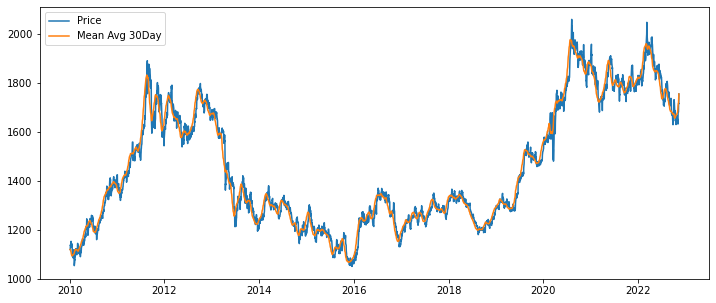

In [258]:
f= plt.figure(figsize=(12,5))

plt.plot(df['Date'], df['Price'], label='Price');
plt.plot(df['Date'], df['Mean Avg 30Day'], label='Mean Avg 30Day');
plt.legend();

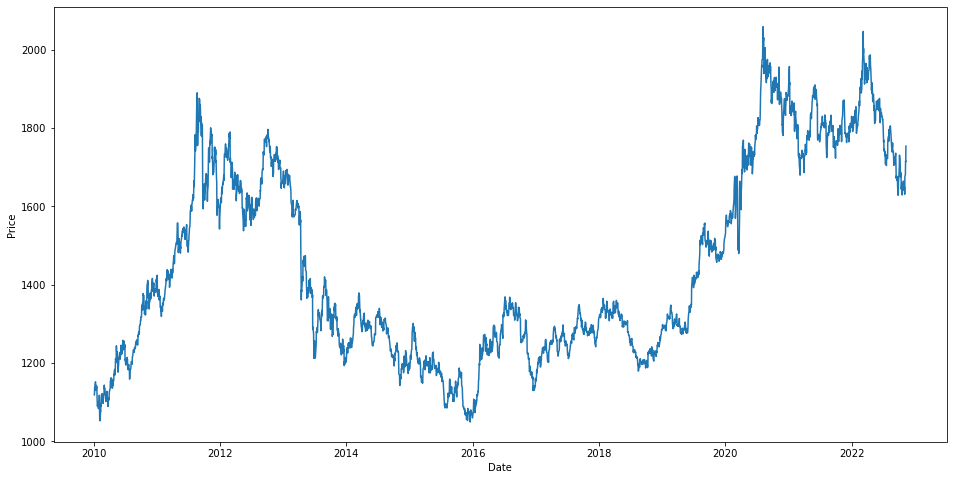

In [259]:
plt.figure(figsize = (16,8))
sns.lineplot(data=df, x="Date", y="Price");

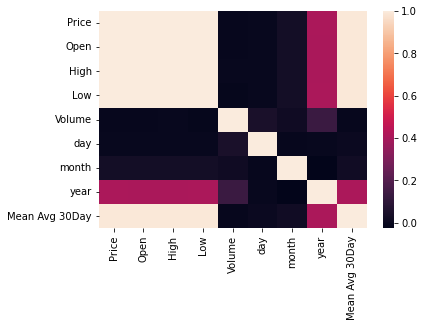

In [260]:
sns.heatmap(df.corr());

In [261]:
#splitting

In [262]:
#train-test split 
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


X = df.drop(['Price','Mean Avg 30Day','Date'],axis=1)
y = df['Price']

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.3)

In [263]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [264]:
#RandomForestRegressor model

regr = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [265]:
predict = regr.predict(X_test)

In [266]:
#cross-validation split
scores = cross_validate(regr, X, y_transformed, cv=5)
scores

{'fit_time': array([3.14123702, 3.07137585, 3.07997203, 3.06941915, 3.04732323]),
 'score_time': array([0.05398798, 0.06033778, 0.05357909, 0.06146288, 0.06255102]),
 'test_score': array([0.94451958, 0.99718163, 0.99383582, 0.99653668, 0.99875677])}

In [271]:
#metrics
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 17.213550548555734
MSE: 708.670462404374
RMSE: 26.62086517009494


In [231]:
#chart

In [304]:
# predictions = pd.DataFrame({"Predictions": predict, "Date": pd.date_range(start ='1-1-2023', 
#                                                periods=len(predict), freq="D")})

 
predictions = pd.DataFrame({"Predictions": predict, "Actual Price": y_test,  "Date": pd.date_range(start ='1-1-2023', 
                                               periods=len(predict), freq="D")})
predictions

,Predictions,Actual Price,Date
0,1715.452478,1721,2023-01-01
1,298.130194,303,2023-01-02
2,2292.092460,2315,2023-01-03
3,205.877602,200,2023-01-04
4,735.444670,753,2023-01-05
...,...,...,...
992,1335.353834,1328,2025-09-19
993,799.887713,784,2025-09-20
994,1911.290271,1908,2025-09-21
995,1970.344959,2046,2025-09-22


<Figure size 1152x576 with 0 Axes>

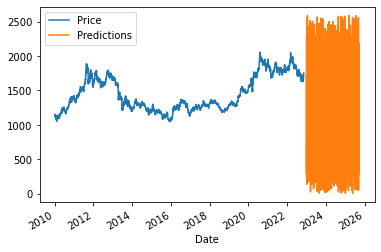

In [301]:
plt.figure(figsize = (16,8))

plt.plot(df['Date'], df['Price'], label='Actual Price');
plt.plot(predictions['Date'], predictions['Predictions'], label='Predicted Prices for ');

plt.legend();